# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [84]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [85]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
    

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | boguchany
Processing Record 2 of Set 1 | at-bashi
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | keetmanshoop
Processing Record 6 of Set 1 | akureyri
Processing Record 7 of Set 1 | trincomalee
Processing Record 8 of Set 1 | refahiye
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | amahai
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | racine
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | aflou
Processing Record 16 of Set 1 | murghob
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | makarov
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | carutapera
Processing Record 23 of

In [86]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [87]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boguchany,58.3814,97.4531,270.85,89,96,5.36,RU,1704766568
1,at-bashi,41.1702,75.8106,259.17,69,26,1.11,KG,1704766667
2,puerto ayora,-0.7393,-90.3518,298.46,96,100,1.34,EC,1704766667
3,isafjordur,66.0755,-23.1240,278.12,90,100,5.71,IS,1704766668
4,keetmanshoop,-26.5833,18.1333,295.50,33,17,2.68,NA,1704766668


In [88]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [89]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boguchany,58.3814,97.4531,270.85,89,96,5.36,RU,1704766568
1,at-bashi,41.1702,75.8106,259.17,69,26,1.11,KG,1704766667
2,puerto ayora,-0.7393,-90.3518,298.46,96,100,1.34,EC,1704766667
3,isafjordur,66.0755,-23.1240,278.12,90,100,5.71,IS,1704766668
4,keetmanshoop,-26.5833,18.1333,295.50,33,17,2.68,NaN,1704766668


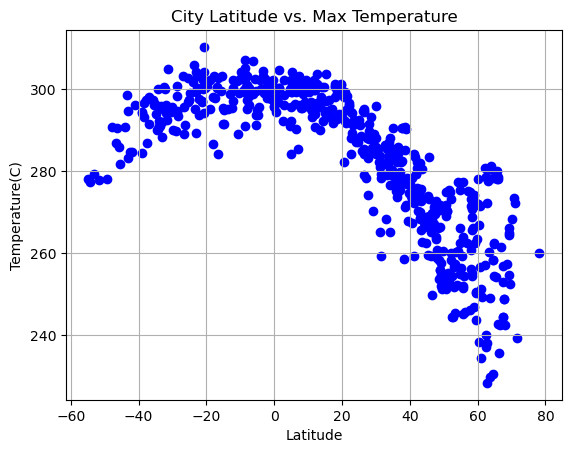

In [90]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",color="b")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")
plt.grid()
plt.show()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

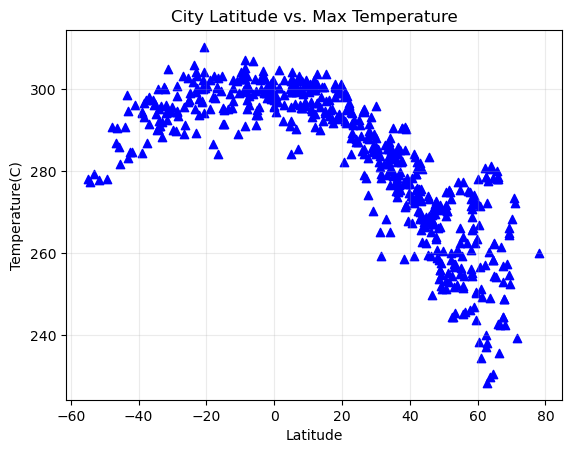

In [91]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="^",color="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")
plt.grid(alpha=.25)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

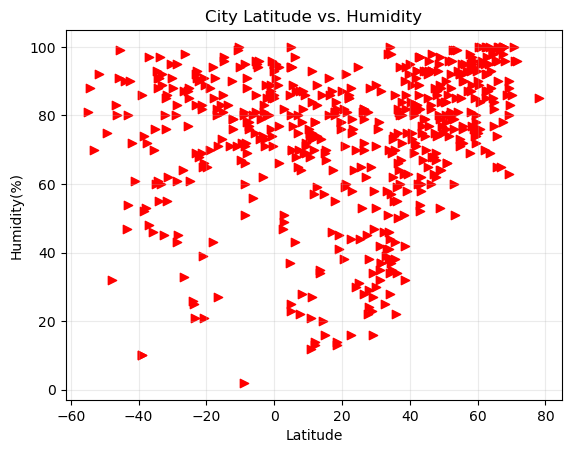

In [92]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker=">",color="r")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(alpha=.25)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

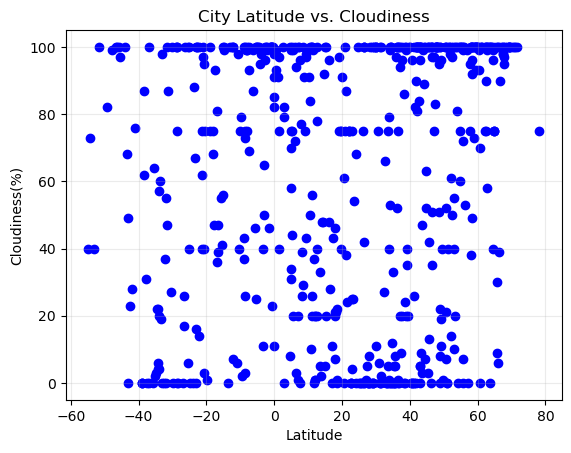

In [93]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",color="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(alpha=.25)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

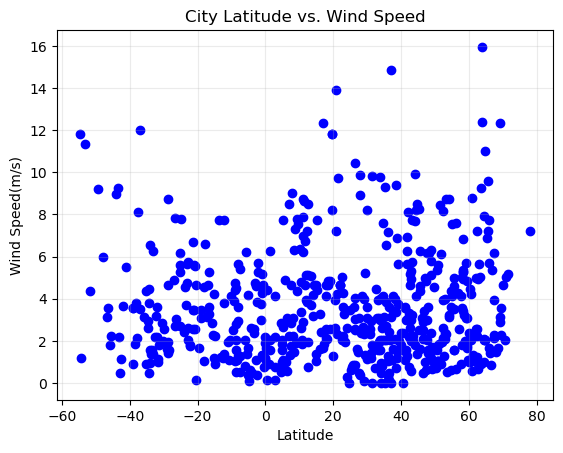

In [94]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",color="b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(alpha=.25)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boguchany,58.3814,97.4531,270.85,89,96,5.36,RU,1704766568
1,at-bashi,41.1702,75.8106,259.17,69,26,1.11,KG,1704766667
3,isafjordur,66.0755,-23.1240,278.12,90,100,5.71,IS,1704766668
5,akureyri,65.6835,-18.0878,280.11,65,9,7.20,IS,1704766668
6,trincomalee,8.5711,81.2335,299.30,87,100,6.29,LK,1704766668


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,298.46,96,100,1.34,EC,1704766667
4,keetmanshoop,-26.5833,18.1333,295.50,33,17,2.68,NaN,1704766668
9,amahai,-3.3333,128.9167,304.39,62,11,2.39,ID,1704766669
13,grytviken,-54.2811,-36.5092,277.22,88,73,1.18,GS,1704766670
16,west island,-12.1568,96.8225,302.14,79,7,7.72,CC,1704766670


###  Temperature vs. Latitude Linear Regression Plot

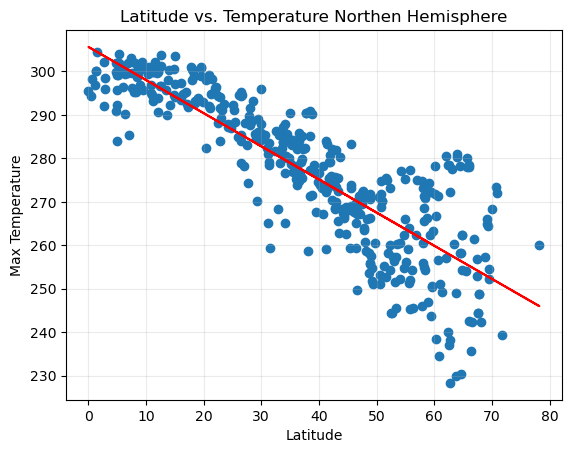

In [98]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Latitude vs. Temperature Northen Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(alpha=.25)
plt.show()

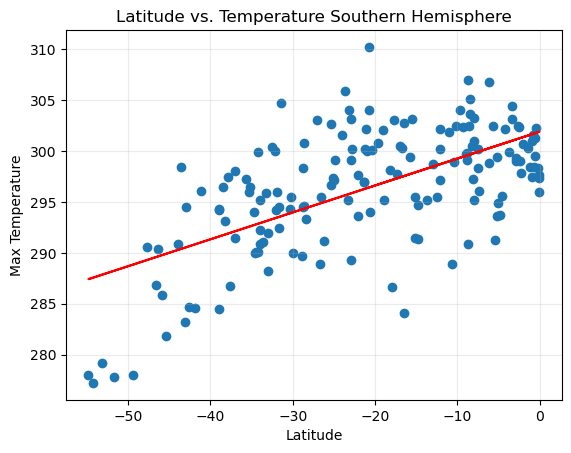

In [99]:
# Linear regression on Southern Hemisphere

x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Latitude vs. Temperature Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(alpha=.25)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

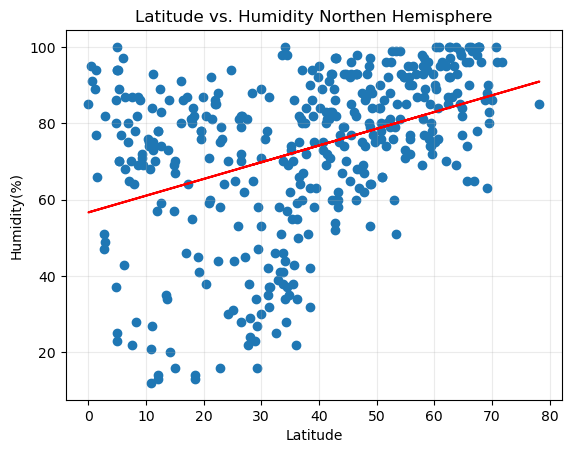

In [100]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Latitude vs. Humidity Northen Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(alpha=.25)
plt.show()

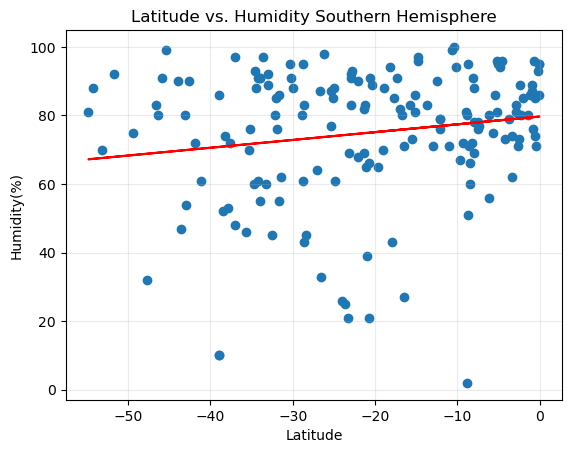

In [101]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Latitude vs. Humidity Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(alpha=.25)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

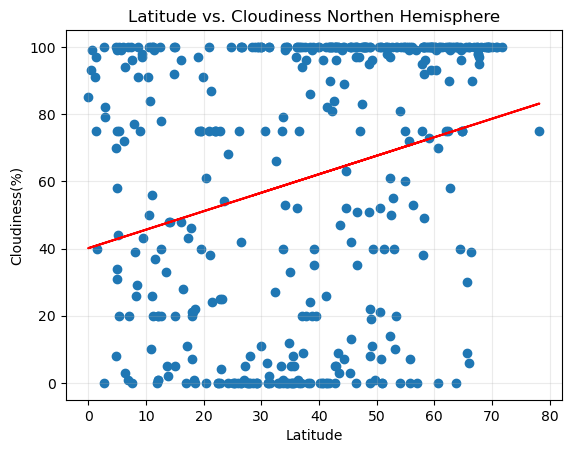

In [102]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Latitude vs. Cloudiness Northen Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(alpha=.25)
plt.show()

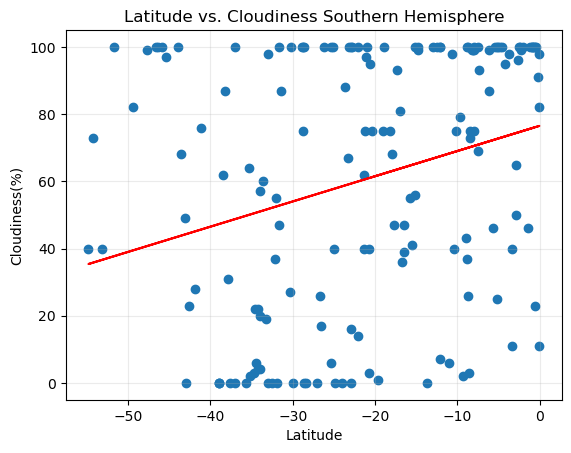

In [103]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Latitude vs. Cloudiness Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(alpha=.25)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

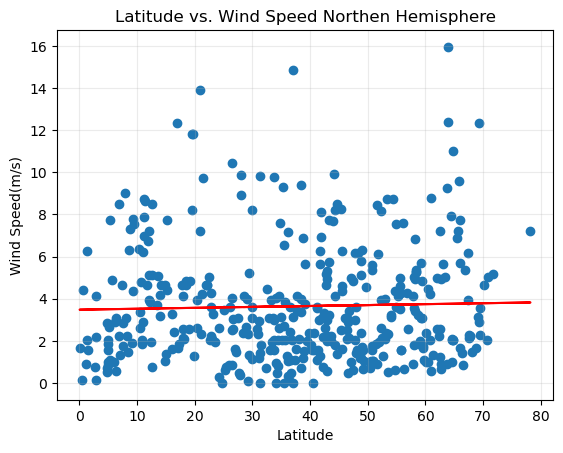

In [104]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Latitude vs. Wind Speed Northen Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(alpha=.25)
plt.show()

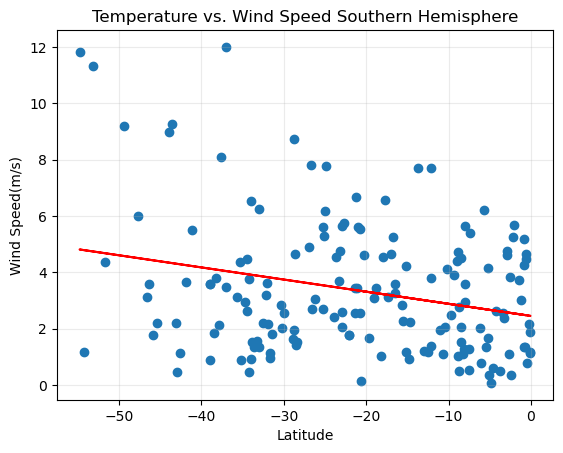

In [105]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Temperature vs. Wind Speed Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(alpha=.25)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE